## ÁLGEBRA LINEAR NUMÉRICA - Projeto 4

### ALUNOS: Alex Júnio Maia de Oliveira e João Pedro Jerônimo de Oliveira

### CURSO: Ciência de Dados e Inteligência Artificial

### ENTREGA: 21/06/2025

---

#### **Observação**: Caso não apareça o arquivo inteiro, apenas rode o Notebook novamente até aparecer o documento completo. Tal erro ocorreu com frequência no desenvolvimento do projeto.

In [37]:
# Bibliotecas usadas
import numpy as np
import seaborn as sns
import random
import time
import matplotlib.pyplot as plt

---

## Questão 1. **Matrizes Gaussianas** Uma matriz gaussiana tem todas as entradas $A_{ij}$ independentes e distribuídas segundo uma normal padrão, ou seja, $A_{ij} ∼ N(0,1)$.

#### a) **Distribuição das normas** Faça um histograma da norma-2 das colunas de uma matriz gaussiana $A$, $m × n$. Use vários valores de $m$, e comente o que você observa.

**Resposta:**

In [38]:
def norm2(x):
    return np.linalg.norm(x, ord=2)

def gaussian_matrix(m:int, n:int):
    return np.random.normal(0, 1, (m,n))

def plot_dist(datas:list, legends:list, xlabel, title="", bins=100, density=True):
    n = len(datas)
    for i in range(n):
        plt.hist(datas[i], bins=bins, label=legends[i], density=density)
    if density:
        plt.ylabel("Densidade")
    else:
        plt.ylabel("Contagem")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.legend()
    plt.show()

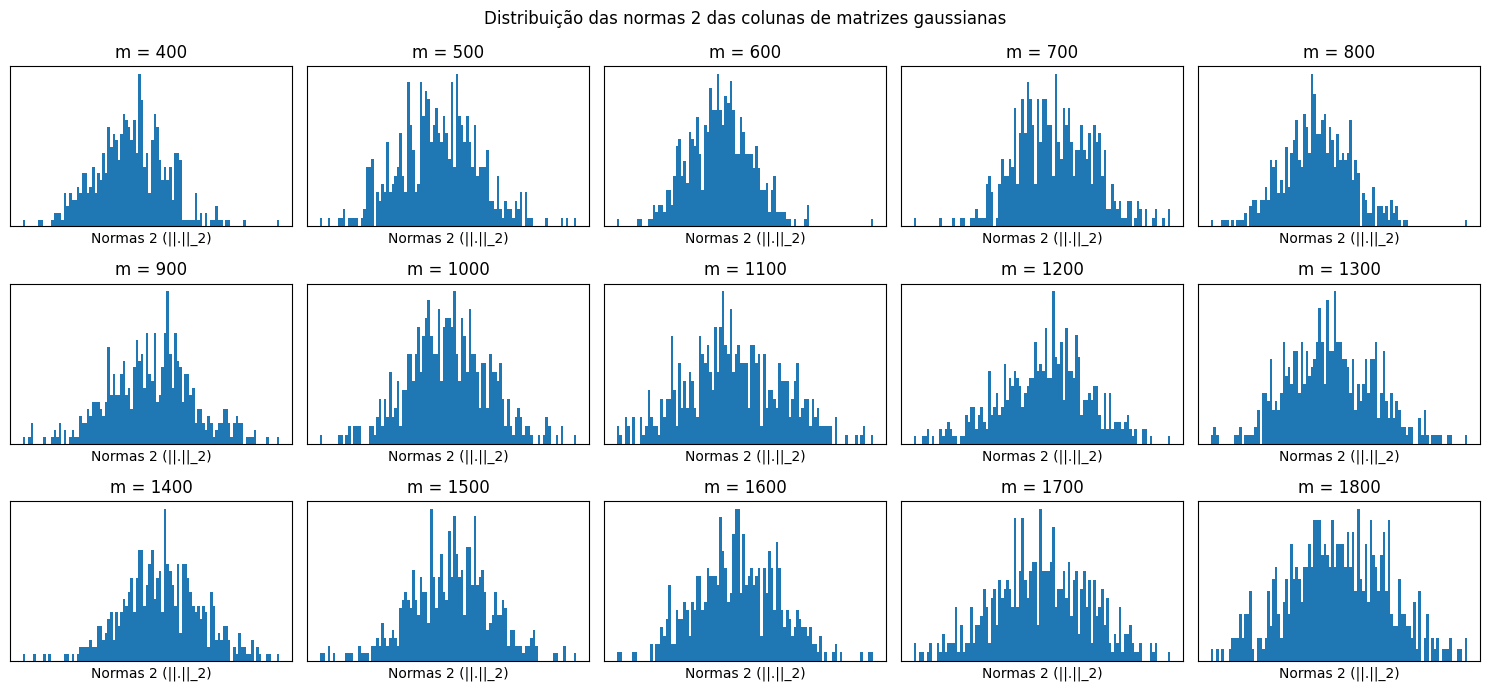

In [39]:
n = 500

grid = [
    [ 400, 500, 600, 700, 800 ],
    [ 900, 1000, 1100, 1200, 1300 ],
    [ 1400, 1500, 1600, 1700, 1800 ]
]

fig, axes = plt.subplots(3, 5, figsize=(15, 7))

fig.suptitle("Distribuição das normas 2 das colunas de matrizes gaussianas")

for i in range(len(grid)):
    for j, m in enumerate(grid[i]):
        A = gaussian_matrix(m,n)
        G = np.dot(A.T, A)  # Calculando o produto interno (G_ij = ⟨A_i, A_j⟩)
        diag_val = np.diag(G)  # Os valores da diagonal é o quadrado da norma (G_ii = ⟨A_i, A_i⟩)
        norm = np.sqrt(diag_val)  # Calculando as normas (||A_i||_2 = √⟨A_i, A_i⟩)

        axes[i][j].set_title(f"m = {m}")

        axes[i][j].hist(
            norm,
            bins=100,
            label="Normas 2",
            density=True
        )

        axes[i][j].set_xlabel("Normas 2 (||.||_2)")
        axes[i][j].set_xticks([])
        axes[i][j].set_yticks([])

plt.tight_layout()
plt.show()

Para ajudar na resolução da questão (e de exercícios posteriores), fizemos três funções: 
- `gaussian_matrix`: cria uma matriz $A$ com cada entrada $A_{ij} ∼ N(0, 1)$ e independentes
- `plot_dist`: faz um plot de várias distribuições

Fazendo testes com $m \in [2, 1000]$ e $n = 500$, criamos matrizes $A_{m×n}$ e calculamos as normas 2 de todas as suas colunas e plotamos a distribuição dos valores, relacionando a densidade de ocorrência de cada intervalo. Portanto, com base no gráfico **Distribuição das normas 2 das colunas de matrizes gaussianas**, concluímos que a distribuição dos valores se aproxima de uma distribuição triangular, a menos de um fator de "crecimento" do tamanho do triângulo.

A distribuição triangular tem *função de densidade de probabilidade (f.d.p):*
$$
f(x) = 
\begin{cases} 
0 & \text{para } x < a \\
\frac{2(x - a)}{(b - a)(c - a)} & \text{para } a \leq x \leq c \\
\frac{2(b - x)}{(b - a)(b - c)} & \text{para } c < x \leq b \\
0 & \text{para } x \geq b
\end{cases}
$$

no nosso caso: $a \approx 0 , b \approx 34 , c \approx 30$

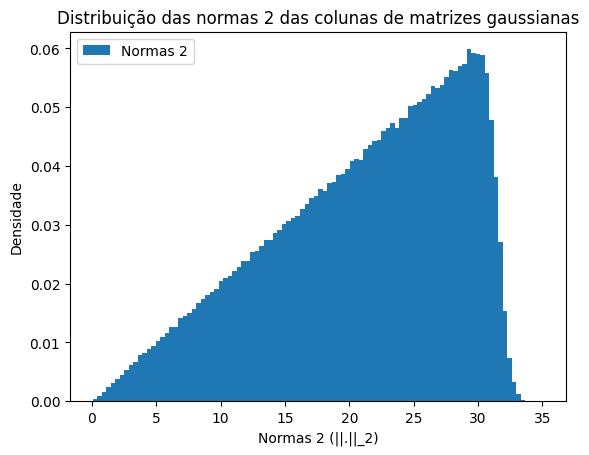

In [40]:
n = 500
norms = []
for m in range(2, 1001):
    A = gaussian_matrix(m,n)
    G = np.dot(A.T, A)  # Calculando o produto interno (G_ij = ⟨A_i, A_j⟩)
    diag_val = np.diag(G)  # Os valores da diagonal é o quadrado da norma (G_ii = ⟨A_i, A_i⟩)
    norm = np.sqrt(diag_val)  # Calculando as normas (||A_i||_2 = √⟨A_i, A_i⟩)
    norms.extend(norm)

plot_dist([norms], density=True, xlabel="Normas 2 (||.||_2)", title="Distribuição das normas 2 das colunas de matrizes gaussianas", legends=["Normas 2"])

---

#### b) **Produtos internos** Agora, fixe $m = 100$ e faça o histograma do produto interno $⟨A_i, A_j⟩$ entre colunas de uma matriz gaussiana $A$. Exclua os casos $i = j$, e use $n = 100,200, 500$ e $1000$. O que acontece? Qual parece ser a distribuição para $n → ∞$?

**Resposta:**

Para ajudar na compreensão do exercício e numa inspiração para explicar o que ocorre quando $m → ∞$, fizemos o gráfico **Distribuição do produto interno das colunas de matrizes gaussianas**, em que mostramos a comparação da distribuição dos produtos internos entre as colunas de uma matriz gaussiana e a distribuição normal de média $0$ e variância $m$.

Pelo gráfico, percebemos que, quanto maior o valor de $m$, mais a distribuição dos produtos internos se aproxima da distribuição normal $N(0, m)$.

*Demonstração:*

- **Fato 1:** Sejam $X_1, X_2, X_3, X_4$ variáveis aleatórias independentes entre si e $Z_1 = X_1X_2, Z_2 = X_3X_4$. Portanto, temos que $Cov(Z_1, Z_2) = E(Z_1Z_2) - E(Z_1)E(Z_2) = E(X_1X_2X_3X_4) - E(X_1X_2)E(X_3X_4) = E(X_1)E(X_2)E(X_3)E(X_4) - E(X_1)E(X_2)E(X_3)E(X_4) = 0$ e, segue que, $Z_1, Z_2$ também são independente. Assim, podemos estender esse resultado para $Z_i = X_iY_i$ com $X_i, Y_i$ indenpendentes.
- **Fato2:** O *Teorema Central do Limite* nos diz que, dadas variáveis aleatórias $X_1, X_2, ..., X_n$ independentes, a soma $S_n = X_1 + X_2 + ... + X_n$ se aproxima da distribuição normal $N(0, n)$ (valor eperado $0$ e variância $n$). A demonstração do teorema está no link: https://www.youtube.com/watch?v=aJcyQjskvqo.

Sejam as colunas $A_i = \begin{bmatrix} x_1 & x_2 & x_3 & \dots & x_m \end{bmatrix}$ e $A_j = \begin{bmatrix} y_1 & y_2 & y_3 & \dots & y_m \end{bmatrix}$. Assim, temos  $⟨A_i, A_j⟩ = \sum_1^mx_iy_i$. Fazendo $z_i = x_iy_i$, temos que $⟨A_i, A_j⟩ = \sum_1^mz_i$. Como as entradas de ambas as colunas são variáveis aleatórias independentes entre si (se estende por toda a matriz), temos que, pelo fato 1, as variáveis $z_1, z_2, ..., z_m$ são independentes entre si e, pelo fato 2, $S_m = ⟨A_i, A_j⟩ = \sum_1^mz_i$ se aproxima da distribuição normal $N(0, m)$ (isso se estende por toda a matriz).


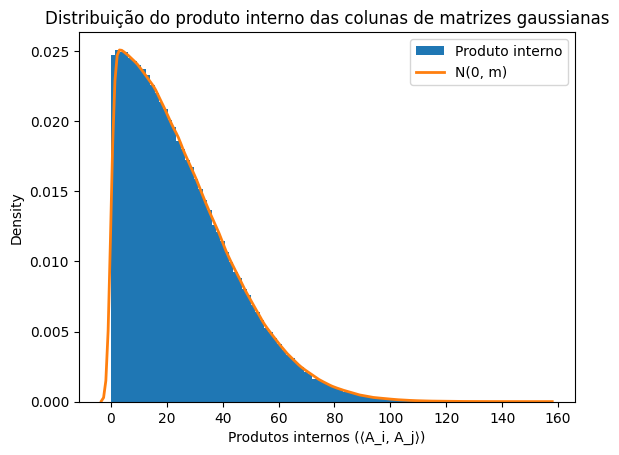

In [41]:
m = 1000
ns = [100, 200, 500, 1000]
prods = []
for n in ns:
    A = gaussian_matrix(m, n)
    G = np.dot(A.T, A)  # Calculando o produto interno (G_ij = ⟨A_i, A_j⟩)
    indices = np.triu_indices(n, k=1) # Valores de ⟨A_i, A_j⟩ para i != j      
    prod = np.abs(G[indices])  # Valor absoluto dos produtos internos                  
    prods.extend(prod)                            

# Plot específico para ver o comportamento da distribuição e compará-la
compare = np.abs(np.random.normal(loc=0, scale=np.sqrt(m), size=1400000))  # Criando uma amostra grande da normal para comparação
                                                                           # loc = esperança e scale = desvio padrão

plt.hist(prods, bins=100, label="Produto interno", density=True)
sns.kdeplot(compare, linewidth=2, label="N(0, m)")
plt.title("Distribuição do produto interno das colunas de matrizes gaussianas")
plt.xlabel("Produtos internos (⟨A_i, A_j⟩)")
plt.legend()
plt.show()

---

#### c) **A distribuição do máximo** Queremos ver quão “não ortogonal” é a matriz $A$. Para isto, vamos estudar o máximo de $\frac{⟨A_i, A_j⟩}{||A_i||||A_j||}$ entre colunas distintas de uma matriz gaussiana $A$. Para isto, gere $K = 1000$ matrizes gaussianas $A_k$ de ordem $100 × 300$, calcule o máximo indicado acima, e faça um histograma dos $K$ valores obtidos.

**Resposta:**

In [42]:
def maxes(k=1000, m=100, n=300):
    max_similarities = []
    for _ in range(k):
        A = gaussian_matrix(m,n)
        A_normalized = A / np.linalg.norm(A, axis=0)
        G = np.dot(A_normalized.T, A_normalized) 
        np.fill_diagonal(G, 0)
        max_val = np.max(np.abs(G))
        max_similarities.append(max_val)
    return max_similarities

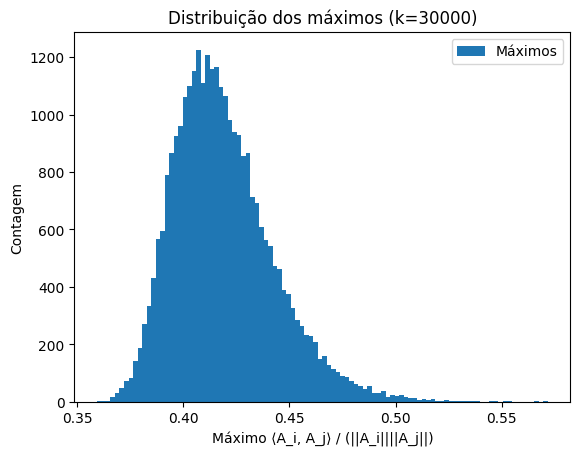

In [43]:
maxes_vals = maxes(k=30000)
plot_dist([maxes_vals], ["Máximos"], xlabel="Máximo ⟨A_i, A_j⟩ / (||A_i||||A_j||)", title="Distribuição dos máximos (k=30000)", density=False)

---

#### d) **Complexidade computacional** Qual a complexidade de calcular o máximo acima? Qual valor de $K$ você acha que seria bom para ter uma boa estimativa do máximo esperado?

**Resposta:**

COMENTÁRIOS ALEX:

Descobrimos também que, teoricamente, podemos diminuir a complexidade do algoritmo de $O(kn^2m)$ para $O(knm^2)$ $(m \le n)$. Primeiramente, fazemos a decomposição SVD reduzida da matriz $A = U\Sigma V^*$, pois pagamos na ordem de $nm^2$ iterações. Após isso, calculamos $A^*A = V\Sigma^* \Sigma V^* = V\Sigma^2V$. Como $\Sigma$ é uma matriz diagonal, pagamos na ordem de $m$ iterações para fazer $x = \Sigma^2V$ e mais $m$ para fazer $Vx$. Por fim, pagamos mais uma ordem $O(1)$ iterações para achar os valores máximos (precisamos percorrer apenas acima ou abaixo da diagonal principal). Repetindo tal processo $K$ vezes, obtemos uma complexidade $O(kn^2m)$. 

Após variar os valores de $k$ no exercício anterior, descobrimos que quanto melhor maior o valor de $k$, mais visível será o comportamento da distribuição e mais *fittada* a curva será, contudo, para não comprometer a performance do computador, escolhemos o valor $k = 30000$. 

Além disso, pesquisando algumas distribuições, encontramos uma que se parece em muito a distribuição dos máximos. O nome de tal distribuição é **Distribuição de Gumbel** (https://en.wikipedia.org/wiki/Gumbel_distribution).

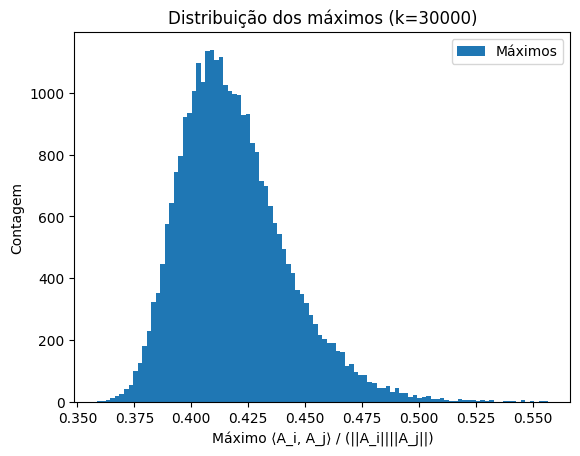

In [44]:
maxes_vals = maxes(k=30000)
plot_dist([maxes_vals], ["Máximos"], xlabel="Máximo ⟨A_i, A_j⟩ / (||A_i||||A_j||)", title="Distribuição dos máximos (k=30000)", density=False)

##### Distribuição de Gumbel

![Exemplo de imagem](https://excelatfinance.com/xlf20/media/xlf-gumbel-density.png)

---

#### e) **A distribuição do máximo, parte 2** Escolha valores de $K$ correspondentes e faça histogramas e comente os resultados para os seguintes pares de $(m, n): (100, 100), (100, 300), (200, 200), (200, 600), (500, 500), (500, 1500), (1000, 1000), (1000, 3000)$.

**Resposta:**

In [45]:
# import multiprocessing as mp

# values = [
#     (10000, 100, 100),
#     (10000, 100, 300),
#     (10000, 200, 200),
#     (10000, 200, 600),
#     (10000, 500, 500),
#     (10000, 500, 1500),
#     (10000, 1000, 1000),
#     (10000, 1000, 3000)
# ]

# with mp.Pool(processes=len(values)/2) as pool:
#     results = pool.map(maxes, values)
#     for result in results:
#         plot_dist([result], [f"Máximo para k={value[0]}, m={value[1]} e n={value[2]}"], title="Distribuição dos máximos", xlabel="Máximo ⟨A_i, A_j⟩ / (||A_i||||A_j||)", density=False)

Fim do documento

---